In [1]:
from xmitgcm import open_mdsdataset
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 14
    , 'legend.markerscale': 1., 'axes.titlesize': 12, 'axes.labelsize' : 12,
      'legend.fontsize' : 12,'legend.handlelength': 2})

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

In [3]:
rhonil = 999.8
rhoconst = 999.8
tref = 20
sref = 35
sbeta = 7.4e-4
talpha = 2e-4


def linear_rho(s, t, sref, tref):
    rho = 1000 * (sbeta * (s - sref) - talpha * (t - tref)) + 1025
    return rho

- plot wind stress and density relaxation

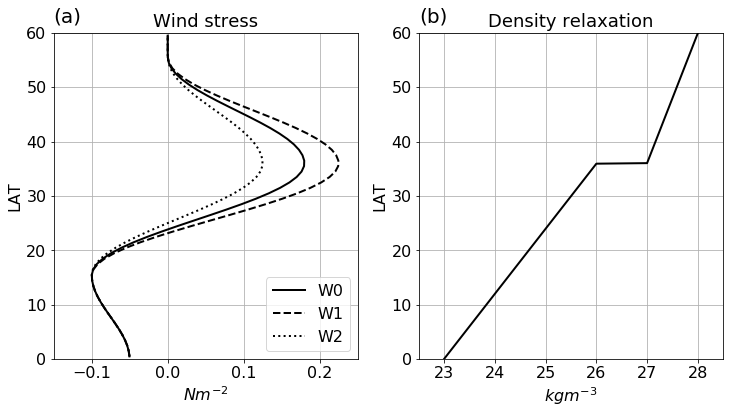

In [6]:
dir = '/WORK/sio_goc03/pv_flux/coarse_0918/den_jump2/taux_real_ex1.bin'
data = np.fromfile(dir, dtype='>f8')
wind1 = np.reshape(data, (60, 60))

dir = '/WORK/sio_goc03/pv_flux/coarse_0918/ex5/taux_real_ex1.bin'
data = np.fromfile(dir, dtype='>f8')
wind2 = np.reshape(data, (60, 60))

dir = '/WORK/sio_goc03/pv_flux/coarse_0918/ex6/taux_real_ex1.bin'
data = np.fromfile(dir, dtype='>f8')
wind3 = np.reshape(data, (60, 60))

dir = '/WORK/sio_goc03/pv_flux/coarse_0918/ex3/taux_real_ex1.bin'
data = np.fromfile(dir, dtype='>f8')
wind4 = np.reshape(data, (60, 60))

dir = '/WORK/sio_goc03/pv_flux/coarse_0918/ex4/taux_real_ex1.bin'
data = np.fromfile(dir, dtype='>f8')
wind5 = np.reshape(data, (60, 60))

dir = '/WORK/sio_goc03/pv_flux/fine_0918/den_jump2/surtemp_ex2.bin'
data = np.fromfile(dir, dtype='>f8')
sst1 = np.reshape(data, (600, 600))

dir = '/WORK/sio_goc03/pv_flux/fine_32/crun/surtemp_ex2_32.bin'
data = np.fromfile(dir, dtype='>f8')
sst2 = np.reshape(data, (1920, 1920))

dir = '/WORK/sio_goc03/pv_flux/fine_0918/crun_0.3/surtemp_ex3.bin'
data = np.fromfile(dir, dtype='>f8')
sst2 = np.reshape(data, (192, 192))

den1 = linear_rho(35, sst1, sref, tref) - 1000
den2 = linear_rho(35, sst2, sref, tref) - 1000

fig = plt.figure(figsize=(12, 6))

yy = np.arange(0.5, 60, 1)
yy2 = np.arange(0.05, 60, 0.1)
yy3 = np.arange(0.03125/2, 60, 0.03125)

ax1 = plt.subplot(121)

ax1.plot(wind1[:, 10], yy, 'k-', linewidth=2, label='W0')
ax1.plot(wind2[:, 10], yy, 'k--', linewidth=2, label='W1')
ax1.plot(wind3[:, 10], yy, 'k:', linewidth=2, label='W2')

plt.legend(loc=4, fontsize=16)
plt.grid()
plt.xlim(-0.15, 0.25)
plt.ylim(0, 60)
plt.xlabel('$N/m^2$', size=16)
plt.ylabel('LAT', size=16)
plt.title('Wind stress', size=18)
plt.text(-0.15, 62, '(a)', size=20)

ax2 = plt.subplot(122)

plt.plot(den1[:, 10], yy2, 'k-', linewidth=2)
#plt.plot(den2[:, 10], np.arange(0.3125/2,60,0.3125), 'r-', linewidth=2)

#plt.plot(den2[:, 10], yy, 'g-', linewidth=1, label='DEN2')
plt.title('Density relaxation', size=18)
plt.xlabel('$kg/m^3$', size=16)
plt.ylabel('LAT', size=16)

plt.xlim(22.5, 28.5)
plt.ylim(0, 60)
plt.grid()
plt.text(22.5, 62, '(b)', size=20)

#plt.legend(loc=4)
plt.savefig('./pics/Figure_01.png', dpi=200, bbox_inches='tight')